# Streamplot
> Streamplot of a two-dimensional linear system

![](streamplot.png)

## Introduction

Streamplot of a two-dimensional linear system, with eigenvectors and nullclines. Python shows LaTeX equations beautifully.  
Main features: `meshgrid, streamplot, contour, legend, LaTeX`

## The code

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

make graph look pretty

In [2]:

# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {
          'font.family': 'serif',
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          # include here any neede package for latex
          'text.latex.preamble': r'\usepackage{amsmath}',
          }
plt.rcParams.update(params)

define parameters, system of equations, and equation for eigenvectors

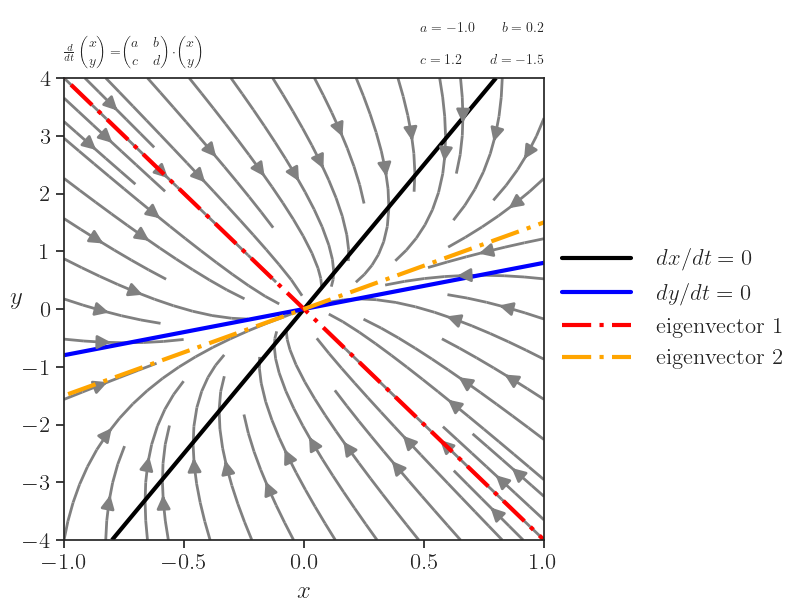

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(left=0.08, right=0.68, top=0.87, bottom=0.10,
                    hspace=0.02, wspace=0.02)
# parameters as a dictionary
p = {'a': -1.0, 'b': +0.2,
     'c': +1.2, 'd': -1.5}

# the equations
def system_equations(x,y):
    return [p['a'] * x + p['b'] * y,
            p['c'] * x + p['d'] * y,
           ]
# eigenvectors
eigen_vec = 100 * np.array([            
                           [(p['a'] - p['d'] -
                            np.sqrt((p['a'] - p['d']) ** 2 +
                                    4.0 * p['b'] * p['c'])) /
                            (2.0 * p['c']), 1.0],
                           [(p['a'] - p['d'] +
                            np.sqrt((p['a'] - p['d']) ** 2 +
                                    4.0 * p['b'] * p['c'])) /
                            (2.0 * p['c']), 1.0],
                           ])

min_x, max_x = [-1, 1]
min_y, max_y = [-4, 4]
divJ = 50j
div = 50
# 1st way
# Y, X = np.mgrid[min_y:max_y:div,min_x:max_x:div]
# 2nd way
X, Y = np.meshgrid(np.linspace(min_x, max_x, div),
                   np.linspace(min_y, max_y, div))

# streamplot
density = 2 * [0.80]
minlength = 0.2
arrow_color = 3 * [0.5]
ax.streamplot(X, Y, system_equations(X, Y)[0], system_equations(X, Y)[1],
              density=density, color=arrow_color, arrowsize=2,
              linewidth=2, minlength=minlength)

# eigenvectors
eigen_0, = ax.plot([eigen_vec[0, 0],-eigen_vec[0, 0]],
                   [eigen_vec[0, 1],-eigen_vec[0, 1]],
                   color='red', lw=3, ls="--")
eigen_1, = ax.plot([eigen_vec[1, 0],-eigen_vec[1, 0]],
                   [eigen_vec[1, 1],-eigen_vec[1, 1]],
                   color='orange', lw=3, ls="--")
dash = (7, 2, 1, 2)
eigen_0.set_dashes(dash)
eigen_1.set_dashes(dash)

# nullclines
null_0 = ax.contour(X, Y, system_equations(X, Y)[0],
                    levels=[0], colors='black', linewidths=3)
null_1 = ax.contour(X, Y,system_equations(X, Y)[1],
                    levels=[0], colors='blue', linewidths=3)
n0, = ax.plot([100,101], [100,101], color='black', linewidth=3)
n1, = ax.plot([100,101], [100,101], color='blue', linewidth=3)

# some text
ax.text(0.0, 1.02, (r"$\frac{d}{dt}\begin{pmatrix}x\\y\end{pmatrix}=$"
                    r"$\begin{pmatrix}a&b\\c&d\end{pmatrix}\cdot$"
                    r"$\begin{pmatrix}x\\y\end{pmatrix}$"),
                    transform=ax.transAxes, va="bottom")
ax.text(1.0, 1.1, r"$a={:.1f}\qquad b={:.1f}$".format(p['a'], p['b']),
        transform=ax.transAxes, ha="right")
ax.text(1.0, 1.03, r"$c={:.1f}\qquad d={:.1f}$".format(p['c'], p['d']),
        transform=ax.transAxes, ha="right")
# param_latex = (r"\begin{align}" +
#                r"a&=1 & b\\" +
#                r"a&=1 & b" +
#                r"\end{align}"
#               )
# ax.text(0.8, 1.1, param_latex, transform=ax.transAxes, ha="right")

ax.legend([n0, n1, eigen_0, eigen_1],
          [r'$dx/dt=0$', r'$dy/dt=0$',
           r"eigenvector 1", r"eigenvector 2"],
          loc="center left",
          bbox_to_anchor=(1.0,0.5),
          frameon=False, fancybox=False, shadow=False, ncol=1,
          borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=1.1,
          borderaxespad=0.3, columnspacing=2)

ax.set_ylabel(r"$y$", rotation='horizontal')
ax.set_xlabel(r"$x$", labelpad=5)

ax.axis([min_x, max_x, min_y, max_y])

fig.savefig("streamplot.png", dpi=300)